# Project Report IV: Finally, Some Data Analysis!
___
**Brief:**<br>
In this report, I'll be taking on the unsupervised and then supervised learning tasks for my project.

**Sections:**<br>
1. [Unsupervised Learning](#1)
    - [Vectorizing Emails](#1a)
    - [K-Clustering TFIDF Vectors](#1b)
2. [Supervised Learning](#2)
___
<a id='1'>

## Unsupervised Learning
<a id='1a'>

***Vectorizing Emails***

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import nltk
from nltk.corpus import PlaintextCorpusReader as cr
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import pickle
file = open('email_df', 'rb')
email_df = pickle.load(file)
file.close()

In [3]:
email_df.head()
len(email_df)

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User
0,"Wed, 13 Dec 2000 18:41:00 -0800 (PST)",1.11913372.-2@multexinvestornetwork.com,pallen@enron.com,"December 14, 2000 - Bear Stearns' predictions ...",1.0,<pallen@enron.com>,,,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,None,In today's Daily Update you'll find free repor...,all_documents,allen-p
1,"Wed, 13 Dec 2000 08:35:00 -0800 (PST)",messenger@ecm.bloomberg.com,Bloomberg Power Lines Report,1.0,text/plain; charset=ANSI_X3.4-1968,,,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,None,None,Here is today's copy of Bloomberg Power Lines....,all_documents,allen-p
2,"Mon, 9 Oct 2000 07:16:00 -0700 (PDT)",phillip.allen@enron.com,keith.holst@enron.com,Consolidated positions: Issues & To Do list,1.0,Keith Holst,,,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,None,---------------------- Forwarded by Phillip K ...,all_documents,allen-p
3,"Mon, 9 Oct 2000 07:00:00 -0700 (PDT)",phillip.allen@enron.com,keith.holst@enron.com,Consolidated positions: Issues & To Do list,1.0,Keith Holst,,,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,None,---------------------- Forwarded by Phillip K ...,all_documents,allen-p
4,"Thu, 5 Oct 2000 06:26:00 -0700 (PDT)",phillip.allen@enron.com,david.delainey@enron.com,,1.0,David W Delainey,,,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,None,"Dave, \n\n Here are the names of the west desk...",all_documents,allen-p


277298

In [4]:
small_df = email_df[:5000]
text = small_df["Text"]

*Note*: So at this point, there is just too much data. Going to use "small_df" the rest of the way.

In [5]:
vectorizer = TfidfVectorizer(stop_words="english")
text_tfidf = vectorizer.fit_transform(text)
text_tfidf

<5000x36846 sparse matrix of type '<class 'numpy.float64'>'
	with 438187 stored elements in Compressed Sparse Row format>

In [6]:
#from sklearn.cluster import KMeans
#k_model = KMeans(n_clusters=3)
#k_model.fit(text_tfidf)
#k_model.predict(text_tfidf)
#labels = k_model.labels_

In [7]:
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#plot = plt.figure()
#ax = Axes3D(plot, rect=[0, 0, 0.95, 1], elev=48, azim=134)
#ax.scatter(text[:, 3], text[:, 0], text[:, 2],
#          c=labels.astype(np.float), edgecolor="k", s=50)
#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_zlabel("z")
#plt.title("K Means", fontsize=14)

*Note*: So, ultimately this has been a very confusing experience for me. I tried to take on unsupervised learning, but I'm really finding myself learning much more on tutorials than I'd like to. Instead, let's take a step back and look other parts of the data.
<a id='1b'>

***Getting A Sense Of Things***<br>
Much of what follows is inspired by a fantastic resource I found on Kaggle (https://www.kaggle.com/dfoly1/k-means-clustering-from-scratch). I'll be using it to help organize my DF better (the _to_datetime_ thing and much of the unsupervised learning).

My first goal is to get a sense of when these emails were sent, so we'll be using the DateTime library!

In [10]:
small_df['Date'] = pd.to_datetime(small_df['Date'], infer_datetime_format=True)

C:\Users\Brett\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
test = small_df["Date"][0]
test
month = test.month
month
year = test.year
year
day = test.day
day

datetime.datetime(2000, 12, 13, 18, 41, tzinfo=tzoffset('PST', -28800))

12

2000

13

In [12]:
months = []
days = []
years = []
for date in small_df['Date']:
    months.append(date.month)
    days.append(date.day)
    years.append(date.year)
small_df["Month"] = months
small_df["Day"] = days
small_df["Year"] = years
small_df[:5]

C:\Users\Brett\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Brett\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Brett\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User,Month,Day,Year
0,2000-12-13 18:41:00-08:00,1.11913372.-2@multexinvestornetwork.com,pallen@enron.com,"December 14, 2000 - Bear Stearns' predictions ...",1.0,<pallen@enron.com>,,,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,None,In today's Daily Update you'll find free repor...,all_documents,allen-p,12,13,2000
1,2000-12-13 08:35:00-08:00,messenger@ecm.bloomberg.com,Bloomberg Power Lines Report,1.0,text/plain; charset=ANSI_X3.4-1968,,,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,None,None,Here is today's copy of Bloomberg Power Lines....,all_documents,allen-p,12,13,2000
2,2000-10-09 07:16:00-07:00,phillip.allen@enron.com,keith.holst@enron.com,Consolidated positions: Issues & To Do list,1.0,Keith Holst,,,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,None,---------------------- Forwarded by Phillip K ...,all_documents,allen-p,10,9,2000
3,2000-10-09 07:00:00-07:00,phillip.allen@enron.com,keith.holst@enron.com,Consolidated positions: Issues & To Do list,1.0,Keith Holst,,,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,None,---------------------- Forwarded by Phillip K ...,all_documents,allen-p,10,9,2000
4,2000-10-05 06:26:00-07:00,phillip.allen@enron.com,david.delainey@enron.com,,1.0,David W Delainey,,,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,None,"Dave, \n\n Here are the names of the west desk...",all_documents,allen-p,10,5,2000


<Figure size 432x288 with 0 Axes>

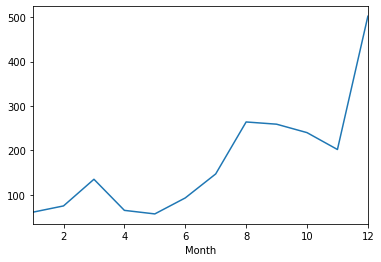

In [22]:
import matplotlib.pyplot as plt
x_ax = (small_df["Year"] == 2000)
plt.figure()
time_graph = small_df.loc[x_ax].groupby("Month")["Text"].count().plot()

*Note*: My chronological graph is working! Onto wordclouds, common users, unique emails, 